# Preprocessing 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [103]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')

In [104]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [105]:
skin_df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [106]:
skin_df['path'] = [f'../raw_data/HAM10000_images_all/{img}.jpg' for img in skin_df['image_id']]

In [107]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033084.jpg
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033550.jpg
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033536.jpg
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_images_all/ISIC_0032854.jpg


## Loading images

In [108]:
skin_df['image'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x)))

KeyboardInterrupt: 

In [109]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg


## Resizing

In [12]:
skin_df['image_resized'] = [np.resize(img, (244,244,3)) for img in skin_df['image']]

In [13]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,...","[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2...","[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,...","[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26...","[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10...","[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."


In [ ]:
plt.imshow(skin_df['image'][3])

In [14]:
skin_df.drop(columns=['image'], inplace = True)

In [15]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[188, 147, 191], [186, 148, 189], [187, 150,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[25, 15, 23], [25, 14, 22], [25, 14, 22], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[186, 128, 140], [188, 128, 136], [183, 126,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[24, 9, 16], [22, 11, 15], [23, 11, 15], [26..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[122, 80, 102], [124, 82, 104], [127, 83, 10..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033084.jpg,"[[[103, 79, 95], [109, 78, 93], [106, 80, 89],..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033550.jpg,"[[[5, 5, 5], [2, 6, 5], [1, 6, 2], [6, 7, 2], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_images_all/ISIC_0033536.jpg,"[[[101, 86, 91], [109, 90, 94], [107, 94, 101]..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_images_all/ISIC_0032854.jpg,"[[[155, 113, 135], [156, 112, 135], [157, 114,..."


## Normalizing

In [16]:
skin_df['image_resized'] = skin_df['image_resized']/255

In [17]:
skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0027419.jpg,"[[[0.7372549019607844, 0.5764705882352941, 0.7..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025030.jpg,"[[[0.09803921568627451, 0.058823529411764705, ..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0026769.jpg,"[[[0.7294117647058823, 0.5019607843137255, 0.5..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_images_all/ISIC_0025661.jpg,"[[[0.09411764705882353, 0.03529411764705882, 0..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_images_all/ISIC_0031633.jpg,"[[[0.47843137254901963, 0.3137254901960784, 0...."


In [18]:
X = skin_df['image_resized']

In [19]:
X.head()

0    [[[0.7372549019607844, 0.5764705882352941, 0.7...
1    [[[0.09803921568627451, 0.058823529411764705, ...
2    [[[0.7294117647058823, 0.5019607843137255, 0.5...
3    [[[0.09411764705882353, 0.03529411764705882, 0...
4    [[[0.47843137254901963, 0.3137254901960784, 0....
Name: image_resized, dtype: object

In [20]:
y = skin_df['dx']

In [21]:
y

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [22]:
y.unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [23]:
dict_target = {'bkl':1, 'nv':2, 'df':3, 'mel':4, 'vasc':5, 'bcc':6, 'akiec':7}

In [24]:
y_num = y.map(dict_target.get)

In [25]:
y_num

0        1
1        1
2        1
3        1
4        1
        ..
10010    7
10011    7
10012    7
10013    7
10014    4
Name: dx, Length: 10015, dtype: int64

In [26]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 8)

In [27]:
y_cat

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

## Target encoding

## Hair removal

In [78]:
import cv2
import matplotlib.pyplot as plt

# create list of image_ids
hair_images=[]
for x in skin_df['image_resized']:
    hair_images.append(x)
    
image_name=[]
for x in skin_df['image_id']:
    image_name.append(x)


# define function to remove hair based on filtering
def hair_removal(image):
    # converts image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(10,10))
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    # apply thresholding to blackhat to focus on hairs
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    # inpaint with original image and threshold image to fill in area behind hair
    final_image = cv2.inpaint(image,threshold,5,cv2.INPAINT_TELEA)
    
    return final_image

In [77]:
len(skin_df)

10015

In [ ]:
for 

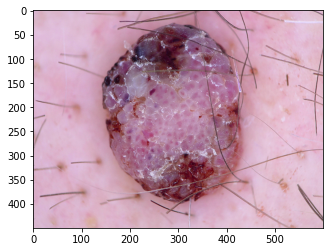

In [70]:
for image in skin_df:
    img = cv2.imread(skin_df['path'][19]) 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)

In [71]:
final_image = hair_removal(img)

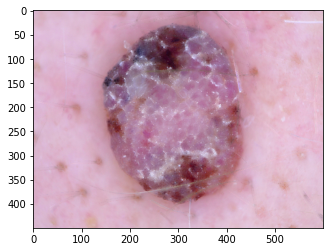

In [72]:
final = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.imshow(final)

In [91]:
#for image in skin_df:
    #img = cv2.imread(skin_df['image_resized'][19]) 
gray = cv2.cvtColor(skin_df['image_resized'][19], cv2.COLOR_BGR2RGB)
plt.imshow("gray",gray.astype('uint8'))

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numerical tuple
>  - Expected Ptr<cv::UMat> for argument 'src'


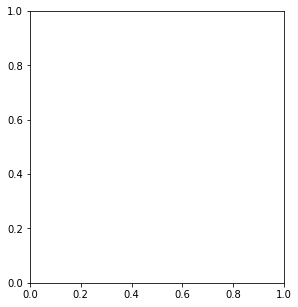

In [51]:
# remove hair
for image in enumerate(random.sample(hair_images[0:10015],10)):
    
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : ')
    
    final_image = hair_remove(image_resize)
    #features_list.append(final_image)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : ')
    
    plt.plot()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDcn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


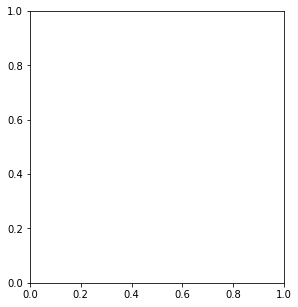

In [42]:
# remove hair
for image, image_name in enumerate(random.sample(hair_images[0:10015],10)):
    
    fig = plt.figure(figsize=(10,5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    final_image = hair_remove(image_resize)
    #features_list.append(final_image)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : '+ image_name)
    
    plt.plot()